# Visualize urban heat stress indices by landunits
- This script is used to visualize hourly mean urban heat stress indices by landunits.
- Simulations: CNTL_GM, LCZ_GM.

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [164]:
labelsize = 6
labelcolor = '#6b6b6b'
linewidth = 0.5
fontsize = 6
boundarywidth = 0.5
alpha = 0.5
padding = 5
var_list = ['HIA', 'SWBGT', 'HUMIDEX']
title_var_list = ['NWS_HI', 'sWBGT', 'HUMIDEX']
title_list = ['(a) ', '(b) ',  '(c) ', '(d) ', '(e) ', '(f) ']
extent = [-2.74, -1.9, 53.32, 53.69]  # Define extent based on your lon and lat range
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/urban_air_temperature/'
sim_list = ['def', 'lcz']
var_grid = 'TSA'
vmin = 35
vmax = 39
urban_lnd_list = [[8,9], [7,8,9,10,11,12,14,15,16]]
urban_lable = [['HD', 'MD'], ['LCZ1', 'LCZ2', 'LCZ3', 'LCZ4', 'LCZ5', 'LCZ6', 'LCZ8', 'LCZ9', 'LCZ10']]
output_dir = home_path + '0_lcz_mcr/output_analysis/regional/heat_stress/'
pad = 2
handletextpad = 0.5
lc0 = '#a6cee3'
lc1 = '#1f78b4'
lc2 = '#b2df8a'
lc3 = '#33a02c'
lc4 = '#fb9a99'
lc5 = '#e31a1c'
lc6 = '#fdbf6f'
lc7 = '#ff7f00'
lc8 = '#cab2d6'
lc_list = [[lc0, lc6, labelcolor, labelcolor],
           [lc0, lc1, lc2, lc3, lc4, lc5, lc6, lc7, lc8, labelcolor, labelcolor]]
marker = 'o'
markersize = 1
yloc_legend = [0.975, 0.92]
xloc_legend = [0.05, 0.125]
y_offset = [0, 0.05]
x_offset = [0.375, 0.42]
ylim_list = [[15, 55], [15, 42], [15, 55]]
threshold_list = [[27, 33, 40, 52], 
                  [26.7, 29.4, 31.1, 32.2],
                  [30, 46, 54]]
xmin = 0
xmax = 30
red_list = ['#ff9696', '#ff6464', '#ff3232', '#ff0000']
threshold_name = [['27-32°C: caution', '33-39°C: extreme caution', '40-51°C: danger', '52°C: extreme danger'],
                  ['26.7-29.3°C: alert', '29.4-31°C: caution', '31.1-32.1°C: potentially dangerous', '≥32.2°C: dangerous'],
                  ['30: some discomfort', '46: dangerous', '54: imminent heat stroke']]

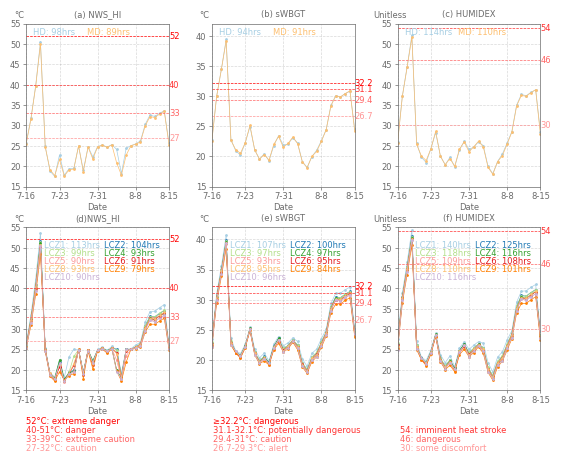

In [165]:
fig, axes = plt.subplots(2, 3, figsize=(5.5, 4.5))
ax = axes.flatten()
for i in range(6):
    tag = sim_list[i//3]
    df = pd.read_csv(output_dir + 'landunit/' + tag + '.csv')
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df_max = df[(df['hour']==15) & (df['time'] <= '2022-08-16') & (df['time'] >= '2022-07-16')].copy().drop(columns=['hour', 'time'])
    for j, numurbl in enumerate(urban_lnd_list[i//3]):
        df_max_lnd = df_max[df_max['numurbl']==numurbl].copy()
        df_max_lnd_var = df_max_lnd[[var_list[i%3], 'month', 'day']].copy()
        df_max_lnd_var['date'] = df_max_lnd_var['month'].astype(str) + '-' + df_max_lnd_var['day'].astype(str)
        ax[i].plot(df_max_lnd_var['date'], df_max_lnd_var[var_list[i%3]], linewidth=linewidth, label=urban_lable[i//3][j], color=lc_list[i//3][j], marker=marker, markersize=markersize, markerfacecolor='none')
        df_numurbl = df[df['numurbl'] == numurbl].copy()
        df_numurbl_var = df_numurbl[[var_list[i%3], 'time']].copy()
        df_numurbl_var_threshold = df_numurbl_var[df_numurbl_var[var_list[i%3]] >= threshold_list[i%3][0]].copy()
        if i<3:
            ax[i].text(xloc_legend[i//3] + x_offset[i//3] * j, yloc_legend[i//3] - y_offset[i//3] *j, urban_lable[i//3][j] + ': ' + str(len(df_numurbl_var_threshold)) + 'hrs', transform=ax[i].transAxes, fontsize=labelsize, color=lc_list[i//3][j], ha='left', va='top')
        else:
            ax[i].text(xloc_legend[i//3] + x_offset[i//3] * (j%2), yloc_legend[i//3] - y_offset[i//3] * (j//2), urban_lable[i//3][j] + ': ' + str(len(df_numurbl_var_threshold)) + 'hrs', transform=ax[i].transAxes, fontsize=labelsize, color=lc_list[i//3][j], ha='left', va='top')
    ax[i].set_title(title_list[i] + title_var_list[i%3], fontsize = fontsize, color = labelcolor, pad = padding)
    ax[i].tick_params(axis='both', labelsize=labelsize, length=2, pad =pad, width = boundarywidth,colors=labelcolor)
    ax[i].grid('both', linewidth=linewidth, color=labelcolor, alpha=alpha/2, linestyle='--')
    if i ==2 or i == 5:
        ax[i].set_ylabel('Unitless', labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
    else:    
        ax[i].set_ylabel('°C', labelpad=5, rotation=0, ha='center', fontsize=labelsize,color=labelcolor)
    ax[i].yaxis.set_label_coords(-0.05, 1.025)
    ax[i].set_ylim(ylim_list[i%3])  
    ax[i].set_xlim([xmin, xmax])
    ax[i].set_xticks([0, 7, 15, 23, 30]) 
    ax[i].set_xlabel('Date', labelpad=1, fontsize=labelsize, color=labelcolor)
    for m in range(len(threshold_list[i%3])):
        ax[i].hlines(y=threshold_list[i%3][m], xmin=xmin, xmax=xmax, linewidth=linewidth, color=red_list[m], linestyle='--')  
        ax[i].text(xmax, threshold_list[i%3][m], str(threshold_list[i%3][m]), verticalalignment='center', fontsize=labelsize, color=red_list[m])
        
    for spine in ax[i].spines.values():
        spine.set_linewidth(boundarywidth)
        spine.set_edgecolor(labelcolor)
plt.subplots_adjust(left=0.04, right=0.975, bottom=0.145, top=0.96, wspace=0.3, hspace=0.25)
for n in range(len(var_list)):
    for o in range(len(threshold_name[n])):
        fig.text(0.04 + 0.34 * n, 0.01 + 0.02 * o, threshold_name[n][o], color = red_list[o], fontsize = labelsize)         
fig.savefig(output_dir + 'heat_stress.png', dpi=300)  
fig.savefig(output_dir + 'heat_stress.pdf', dpi=600)            

In [83]:
for i in range(6):
    tag = sim_list[i//3]
    df = pd.read_csv(output_dir + 'landunit/' + tag + '.csv')
    df['time'] = pd.to_datetime(df['time'])
    df['hour'] = df['time'].dt.hour
    df['month'] = df['time'].dt.month
    df['day'] = df['time'].dt.day
    df_max = df[(df['hour']==15) & (df['time'] <= '2022-08-16') & (df['time'] >= '2022-07-16')].copy().drop(columns=['hour', 'time'])
    for j, numurbl in enumerate(urban_lnd_list[i//3]):
        df_max_lnd = df_max[df_max['numurbl']==numurbl].copy()
        df_max_lnd_var = df_max_lnd[[var_list[i%3], 'month', 'day']].copy()
        df_max_lnd_var['date'] = df_max_lnd_var['month'].astype(str) + '-' + df_max_lnd_var['day'].astype(str)
        ax[i].plot(df_max_lnd_var['date'], df_max_lnd_var[var_list[i%3]], linewidth=linewidth, label=urban_lable[i//3][j], color=lc_list[i//3][j], marker=marker, markersize=markersize, markerfacecolor='none')
        df_numurbl = df[df['numurbl'] == numurbl].copy()
        df_numurbl_var = df_numurbl[[var_list[i%3], 'time']].copy()
        df_numurbl_var_threshold = df_numurbl_var[df_numurbl_var[var_list[i%3]] >= threshold_list[i%3][0]].copy()

In [85]:
len(df_numurbl_var_threshold)

116